In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 2 & tutorial name: polymer-in-water
figures will be saved in /docs/sphinx/source/tutorials/figures/level2/polymer-in-water/


In [9]:
init = np.loadtxt("initial.histo", skiprows=4)
final = np.loadtxt("final.histo", skiprows=4)

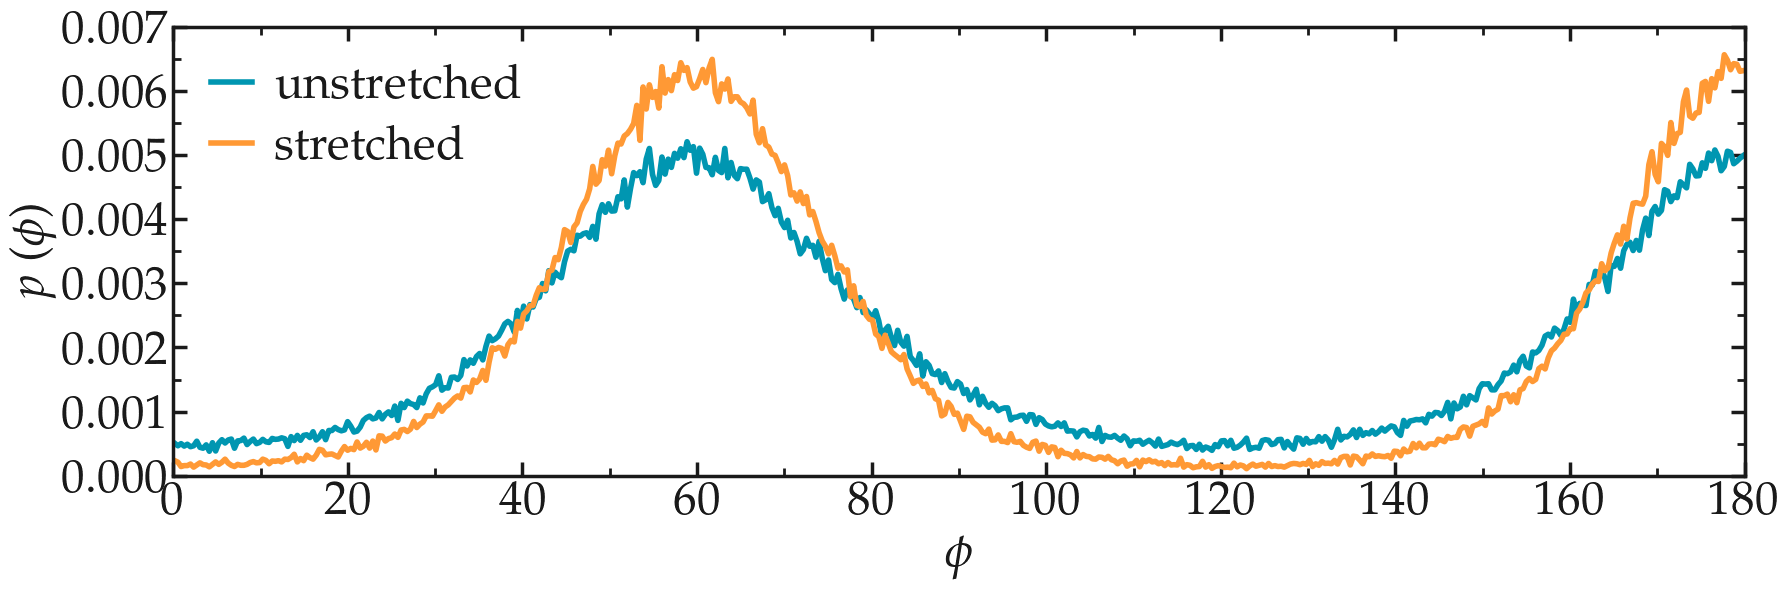

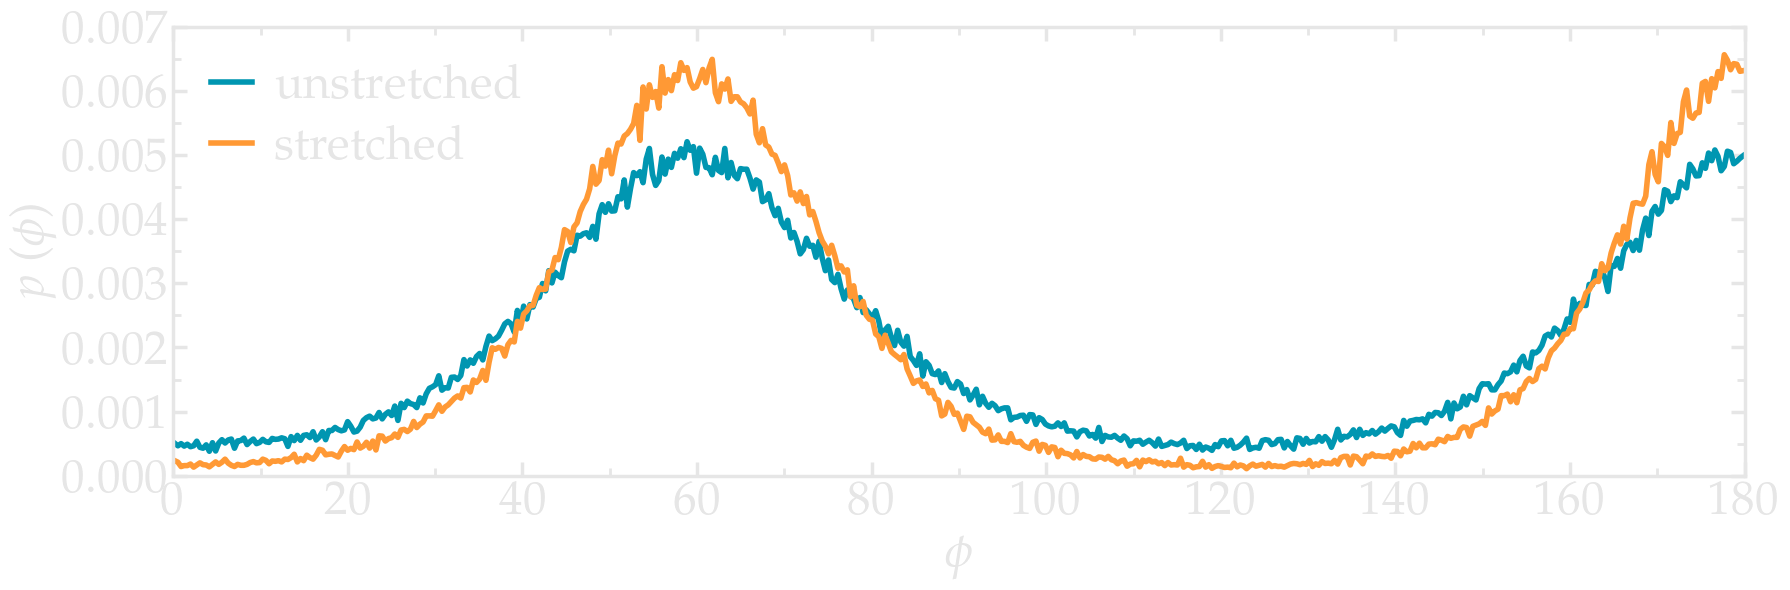

In [33]:
filename = "dihedral_angle"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    
    ax[-1].plot(init.T[1], init.T[3], '-', color=colors["myblue"],
                markersize = 12, linewidth=4, label=r"unstretched")
    ax[-1].plot(final.T[1], final.T[3], '-', color=colors["myorange"],
                markersize = 12, linewidth=4, label=r"stretched")
    complete_panel(ax[-1], r'$\phi$', r'$p$ ($\phi$)', legend=True, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 181, 20), x_boundaries=(0, 180),
                   y_ticks=np.arange(0, 0.0071, 0.001), y_boundaries=(0, 0.007))
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)